Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 525,313 (2.00 MB)

 Trainable params: 525,313 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.5551 - loss: 0.7299 - val_accuracy: 0.6678 - val_loss: 0.6191
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.6786 - loss: 0.6002 - val_accuracy: 0.6991 - val_loss: 0.5858
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.7297 - loss: 0.5517 - val_accuracy: 0.7238 - val_loss: 0.5467
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.7592 - loss: 0.4974 - val_accuracy: 0.7016 - val_loss: 0.5584
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.7774 - loss: 0.4711 - val_accuracy: 0.7233 - val_loss: 0.5435
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.7998 - loss: 0.4315 - val_accuracy: 0.7177 - val_loss: 0.5502
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.8144 - loss: 0.4082 - val_accuracy: 0.7419 - val_loss: 0.5423
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.8419 - loss: 0.3698 - 

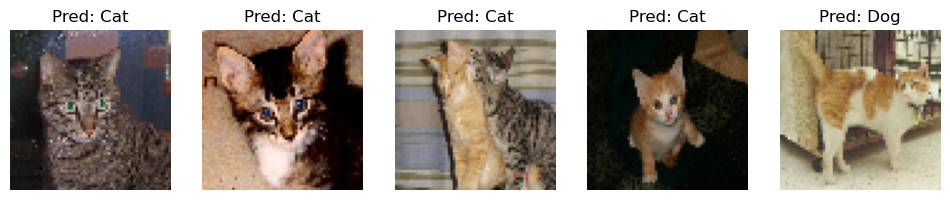

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

train_dir = r'C:\Users\loalo\OneDrive\training\Level_24_\dogs-vs-cats'

IMG_SIZE = 64
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', strides=2, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=10
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    train_dir, 
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode=None,
    shuffle=False
)

predictions = model.predict(test_generator, steps=test_generator.samples // BATCH_SIZE)

def plot_sample_predictions(generator, predictions, num_samples=5):
    plt.figure(figsize=(12, 12))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        img = next(generator) 
        plt.imshow(img[0])
        plt.title(f'Pred: {"Dog" if predictions[i] > 0.5 else "Cat"}')
        plt.axis('off')
    plt.show()

test_generator.reset()

plot_sample_predictions(test_generator, predictions)

# Note on padding and stride
# Note: The Conv2D layer with padding='same' and strides=2 reduces the spatial dimensions
# of the input by half while maintaining the same depth. This is because the stride of 2
# effectively skips every other pixel, reducing the width and height by a factor of 2.
